In [1]:
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data/Train_Data.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


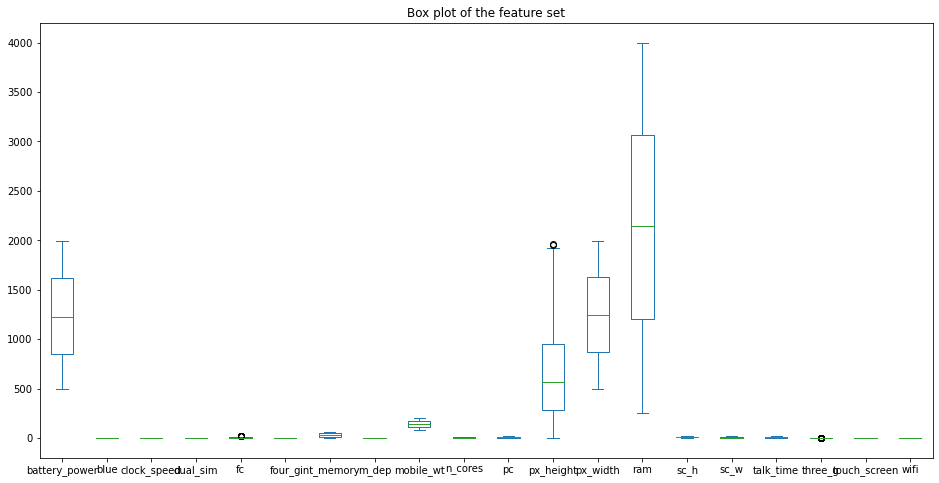

In [4]:
df.plot(kind = 'box',figsize = (16,8),title = 'Box plot of the feature set')
plt.savefig('boxplot.png')

{'bodies': [<matplotlib.collections.PolyCollection at 0x1a50173d5e0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1a50173d490>,
 'cmins': <matplotlib.collections.LineCollection at 0x1a50173daf0>,
 'cbars': <matplotlib.collections.LineCollection at 0x1a50173de20>}

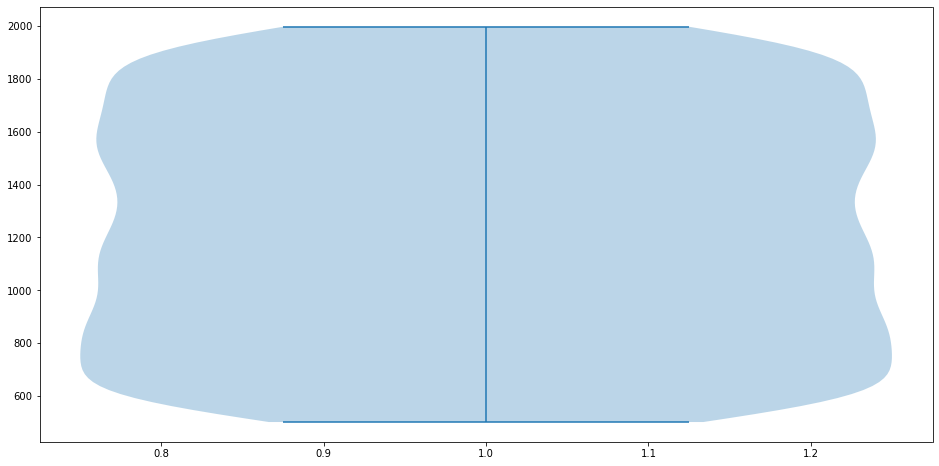

In [5]:
plt.figure(figsize = (16,8))
plt.violinplot(df['battery_power'])

In [6]:
features = df.columns.values

In [7]:
len(features)

20

In [8]:
accuracies = {}

In [2]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
# from sklearn.tree import DecisionTreeClassifier


In [10]:
x = df
y = pd.read_csv('data/Traindata_classlabels.csv')

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)

NameError: name 'x' is not defined

In [12]:
features = df.columns.values

In [4]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [14]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
from io import StringIO 
dot_data = StringIO()
tree.export_graphviz(dtree,out_file=dot_data,feature_names=features)
# graph = pydotplus.graph_from_dot_data(data)


# tree.export_graphviz(clf, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('mydecisiontree.png')
# graph.write_pdf("iris.pdf")

# img=pltimg.imread('mydecisiontree.png')
# imgplot = plt.imshow(img)
# plt.show()
prediction = dtree.predict(x_test)

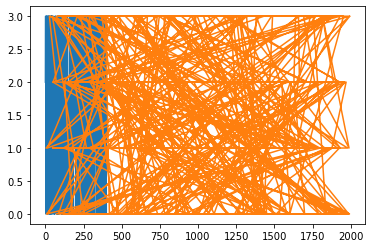

In [15]:
plt.plot(prediction)
plt.plot(y_test)

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,prediction)
# confusion_matrix(y_test,prediction)

NameError: name 'prediction' is not defined

In [10]:
# !set PATH=PATH;C:\path\to\anaconda\Library\bin\graphviz\

In [11]:
# pip install graphviz

In [13]:
# !conda install python-graphviz

^C


In [14]:
accuracies['dtree'] = accuracy_score(y_test,prediction)

## K-neighbours

K-neighbours doesnt' work
I'll try to make it work

In [10]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import scipy
from sklearn import preprocessing, cluster

In [15]:
x_train
y_train

,price_range
1176,3
1128,0
184,3
1807,0
35,1
...,...
1142,2
998,3
1725,1
206,2


In [54]:
modelKNN = KNeighborsClassifier()
params = {
    "n_neighbors": np.arange(2,25 ,1),
    "metric": [
        "cityblock",
        "cosine",
        "euclidean",
        "l1",
        "l2",
        "manhattan",
        "nan_euclidean",
    ],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
#     'p' :np.arange(2,10,1),
#     'leaf_size' : np.arange(1,12,1)
}
clfKNN = GridSearchCV(modelKNN, params, cv=10, n_jobs=11,scoring = 'accuracy')
clfKNN.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=11,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['cityblock', 'cosine', 'euclidean', 'l1',
                                    'l2', 'manhattan', 'nan_euclidean'],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24]),
                         'p': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [55]:
clfKNN.best_params_#updated2

{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 18,
 'p': 2,
 'weights': 'distance'}

In [49]:
clfKNN.best_params_#updated

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'cityblock',
 'n_neighbors': 18,
 'weights': 'distance'}

In [39]:
clfKNN.best_params_

{'algorithm': 'auto',
 'metric': 'cityblock',
 'n_neighbors': 18,
 'weights': 'distance'}

In [4]:
from sklearn.metrics import classification_report

In [56]:
predKNN = clfKNN.predict(x_test)#updated2
print(classification_report(y_test, predKNN))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.90      0.93      0.91        92
           2       0.90      0.90      0.90       101
           3       0.98      0.93      0.96       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [50]:
predKNN = clfKNN.predict(x_test)#updated
print(classification_report(y_test, predKNN))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.90      0.93      0.91        92
           2       0.90      0.90      0.90       101
           3       0.98      0.93      0.96       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [41]:
predKNN = clfKNN.predict(x_test)
print(classification_report(y_test, predKNN))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.90      0.93      0.91        92
           2       0.90      0.90      0.90       101
           3       0.98      0.93      0.96       104

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [18]:
from sklearn import metrics

In [43]:
acc=metrics.accuracy_score(y_test, predKNN)
acc

0.9375

## Regression

In [19]:
import sklearn.linear_model as skl_lm  # for regression
from sklearn.model_selection import (
    train_test_split,
)  # splitting data into test,train sets

from sklearn.metrics import mean_squared_error  # for metrics

import matplotlib.pyplot as plt  # plotting library

import seaborn as sns  # another plotting library

In [44]:
# x_train,y_train
x = df
y = pd.read_csv('data/Traindata_classlabels.csv')

In [45]:
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [46]:
M1 = skl_lm.LinearRegression()  # defining a Regression model
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=1 / 3, random_state=5
)  # test, train sets are split from the original data

M1.fit(X_train, y_train)  # Fitting the model to the train sets

print("Intercept :", M1.intercept_)
print("Coefficients :", M1.coef_)

Intercept : [-1.55899049]
Coefficients : [[ 0.00050629  0.00476474 -0.01595955 -0.01894964  0.00311849 -0.01098235
   0.00041813  0.02371037 -0.00094478  0.00100936 -0.00300275  0.00028804
   0.00026873  0.00094863  0.00228236 -0.00059823  0.00079484  0.04173836
  -0.00503399 -0.0182401 ]]


In [47]:
m1_pred = M1.predict(X_test)
rmse = mean_squared_error(
    y_test, m1_pred, squared=False
)  # if squared is 'True' it gives MSE or else it gives RMSE
print("RMSE (M1) : %.3f" % rmse)

RMSE (M1) : 0.320


In [51]:
X_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1011,772,0,2.6,1,7,0,6,0.1,100,2,10,741,1471,929,13,6,18,0,1,1
985,1068,0,0.7,1,9,0,51,0.5,124,4,15,1405,1910,550,12,8,6,1,1,0
1331,1407,0,1.8,1,5,1,16,0.2,170,4,6,925,1206,1068,6,0,8,1,1,0
833,1368,1,1.6,1,4,0,9,0.1,115,7,7,843,1145,2941,13,12,17,0,1,0
1741,946,1,1.4,0,9,0,26,0.1,186,6,10,273,891,1637,7,3,6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1142,1193,1,3.0,0,10,0,56,0.4,196,3,17,674,864,2394,19,11,14,1,1,0
998,1373,1,1.9,1,1,1,29,0.9,141,6,12,1220,1348,2752,15,2,7,1,1,1
1725,1117,1,0.5,1,2,0,21,0.1,177,2,19,495,1035,1999,15,9,2,1,0,1
206,1642,0,0.5,1,16,1,8,0.3,171,6,17,129,873,2984,13,4,17,1,0,1


## Cross-Val

In [22]:
from sklearn.model_selection import (
    KFold,
)  # Splitting the data into K folds used for cv (Cross Validation)
from sklearn.model_selection import cross_val_score  # For calculating the RMSE
from sklearn.model_selection import cross_val_predict  # For predictions using cv

In [25]:
import warnings

warnings.filterwarnings("ignore")

In [52]:
kfold = KFold(n_splits=10,random_state=5,shuffle = True)
M2 = skl_lm.LogisticRegressionCV(Cs = 10,cv = 10,random_state=5).fit(X_train.values, y_train.values)
# M2.score(x,y)
# results = cross_val_score(
#     M2, x, y, cv=kfold, scoring="accuracy"
# ) 
# sklearn.model_selection.cross_validate
# rmse = np.mean(np.sqrt(np.abs(results)))  # Converting MSE to RMSE
# print("RMSE (M2) : %.3f" % results)

AttributeError: 'str' object has no attribute 'decode'

In [30]:
results
# score.keys

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

## Step-wise regression

In [64]:
import statsmodels.api as sm

In [75]:

x_columns =df.columns.values.tolist()  # getting the regression variables
#  = df
y = y

top = 5
def stepwise_reg():
    x = df[x_columns]
    results = sm.OLS(y, x).fit()  # Fitting a OLS model on y,x
    aic = []
    if len(x_columns) != top:  # condition, so we only get top 2 regressors
        re = results.pvalues  # Finding the p values of independent variables
        aic.append(results.aic)
        k = re[
            re == re.max()
        ].index.array  # removing the least favorable regressor ie., max p value.
        x_columns.remove(k[0])
        #         print(results.pvalues,results.aic,x_columns)
        stepwise_reg()  # looping through the regression once again.
    else:
        print(f"The top {top} regressors are :",end = '')
        for i in range(top):
            print(f", {x_columns[i]} ",end = '')


stepwise_reg()

The top 5 regressors are :, battery_power , mobile_wt , px_height , ram , sc_h 

## logistic regression

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 5)
# y_train


In [91]:

logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(x_train.values, y_train.values.ravel())
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[97  6  0  0]
 [11 53 28  0]
 [ 0 30 56 15]
 [ 0  0  5 99]]


In [92]:
acc = metrics.accuracy_score(y_test, predictions)
acc

0.7625

<AxesSubplot:ylabel='Frequency'>

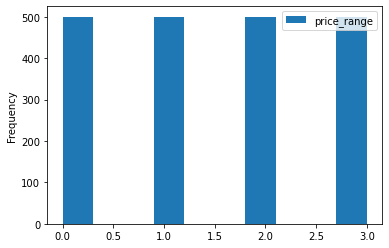

In [38]:
y.plot(kind = 'hist')

In [74]:
y.value_counts().index.values.tolist()

[(0,), (1,), (2,), (3,)]

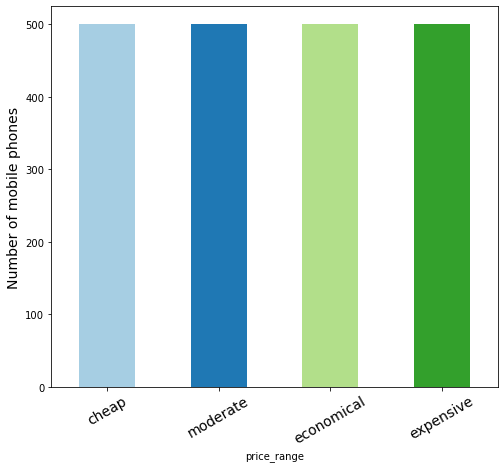

In [106]:
col_map = plt.get_cmap('Paired')

y.value_counts().plot(kind = 'bar',rot = 30,ylabel = 'Number of mobile phones',color = col_map.colors,figsize = [8,7])
plt.ylabel('Number of mobile phones',fontsize =14 )
plt.xticks(ticks = [0,1,2,3] ,labels=['cheap','moderate','economical','expensive'],fontsize=14)
plt.savefig('mobile_data_dist.png',dpi = 100)
# plt.show()


In [36]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


## RTree

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
x = pd.read_csv('data/Train_Data.csv')
y = pd.read_csv('data/Traindata_classlabels.csv')
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=1 / 3, random_state=5
)
Rtree = DecisionTreeRegressor(random_state=5)
Rtree.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [7]:
Rtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 5,
 'splitter': 'best'}

In [12]:
pred = Rtree.predict(X_test)
accuracy_score(y_test,pred)
# pred

0.8455772113943029

In [13]:

# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
# export_graphviz(Rtree, out_file ='tree.dot',)
#                feature_names =['Production Cost']) 
# graph = pydotplus.graph_from_dot_file('tree.dot')
# graph.write_png('myRtree.png')

In [14]:
modelRtree=  DecisionTreeRegressor()
params = {
    "criterion": ["squared_error", "absolute_error","poisson"],

    "splitter" : ["best", "random"],
    "max_depth" :np.arange(5,10,1),
    "max_features" :  ["auto", "sqrt", "log2"],
    "max_leaf_nodes" : np.arange(2,8,1),
    "ccp_alpha" :  np.arange(0,2,0.5)
}
clfRtree= GridSearchCV(modelRtree, params, cv=10, n_jobs=11)
clfRtree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=11,
             param_grid={'ccp_alpha': array([0. , 0.5, 1. , 1.5]),
                         'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7]),
                         'splitter': ['best', 'random']})

In [15]:
clfRtree.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 7,
 'splitter': 'best'}

In [16]:
predRtree = clfRtree.predict(X_test)#updated2
print(classification_report(y_test, predRtree))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [17]:
predRtree
# y_train

array([1.34020619, 2.8372093 , 2.8372093 , 0.20867209, 1.80487805,
       0.20867209, 2.28      , 2.8372093 , 1.80487805, 1.34020619,
       2.8372093 , 0.20867209, 2.8372093 , 2.8372093 , 2.28      ,
       0.20867209, 1.80487805, 2.8372093 , 1.34020619, 2.8372093 ,
       0.20867209, 1.34020619, 2.8372093 , 1.80487805, 2.8372093 ,
       1.80487805, 1.80487805, 2.8372093 , 0.20867209, 1.34020619,
       0.20867209, 1.34020619, 0.20867209, 0.20867209, 2.8372093 ,
       2.28      , 0.20867209, 2.8372093 , 2.8372093 , 0.20867209,
       2.28      , 0.20867209, 2.28      , 1.80487805, 2.8372093 ,
       2.8372093 , 0.20867209, 0.20867209, 1.80487805, 1.34020619,
       2.28      , 2.8372093 , 2.28      , 2.28      , 1.80487805,
       0.20867209, 0.16129032, 0.20867209, 1.80487805, 0.96226415,
       0.20867209, 0.20867209, 2.8372093 , 2.8372093 , 0.96226415,
       1.34020619, 1.80487805, 2.8372093 , 2.28      , 0.16129032,
       1.80487805, 2.8372093 , 0.20867209, 0.20867209, 0.20867